<a href="https://colab.research.google.com/github/nurfnick/Mathematical_Musings/blob/main/CrapsSimulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Craps Simulator for One Shooter

## MAA OK-AR Section Presentation



> **Abstract**: 
> The game of craps is a simple probabilitstic game played with dice around the world for gambling purposes.  We will examine the game through simulation using python and Jupyter notebooks.  We will discuss expected values, interesting observations on the game play and why the table is often the loudest at the casino.



## Simulating Six Sided Dice

In [43]:
import random

random.randint(1,6)

3

Above code rolls a dice once.

In [44]:
def Roll2Dice():
  return [random.randint(1,6),random.randint(1,6)]

In [45]:
Roll2Dice()

[6, 2]

This rolls two dice.  The game of craps is actually interested in the sum of the two dice most of the time...  We know that this is distributed like the following:

Sum | Probability
----|------------
2|$\frac 1{36}$
3|$\frac 2{36}$
4|$\frac 3{36}$
5|$\frac 4{36}$
6|$\frac 5{36}$
7|$\frac 6{36}$
8|$\frac 5{36}$
9|$\frac 4{36}$
10|$\frac 3{36}$
11|$\frac 2{36}$
12|$\frac 1{36}$

We want to make sure we are seeing that in our simulation!

First I check using the built-in histogram feature from `numpy` and visualize with `matplotlib`.

In [4]:
from numpy import histogram
import numpy as np
import matplotlib.pyplot as plt

listy = []

for i in range(10000):
  listy.append(sum(Roll2Dice()))

histogram(listy,bins = 11)

(array([ 269,  537,  838, 1131, 1349, 1685, 1441, 1110,  852,  549,  239]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]))

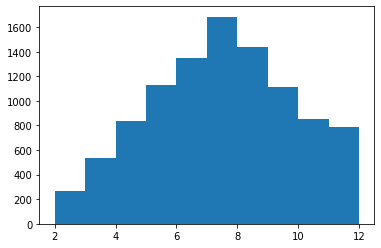

In [5]:
plt.hist(listy)
plt.show()

That did not come out in the way I expected.  Let's tweek it a bit and do it by hand.

In [6]:
sums = range(2,13,1)
newlist =[]
for i in sums:
  newlist.append(0)

for i in listy:
  for j in sums:
    if i == j:
      newlist[i-2] +=1

newlist

[269, 537, 838, 1131, 1349, 1685, 1441, 1110, 852, 549, 239]

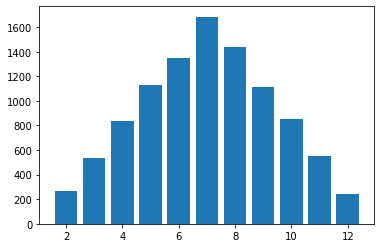

In [7]:
plt.bar(x =sums, height = newlist)
plt.show()

Above I have checked that the outcomes are random but as expected.  Both codes do the same thing, even though the output is a bit different!  We should check that this does indeed follow the distribution given by preforming the goodness of fit test.

$$
\chi^2 = \sum_{i = 1}^n \frac{\left(O_i - E_i\right)^2}{E_i}
$$


In [8]:
expected = np.array([1,2,3,4,5,6,5,4,3,2,1])
expected = expected/36*10000

actual = np.array(newlist)

chi = 0
for i,val in enumerate(expected):
  chi += (val-actual[i])**2/val

chi

10.491740000000005

In [9]:
from scipy import stats

1-stats.chi2.cdf(chi,10)

0.3984600274759562

Getting the probability is much easier by using the builtins!

In [10]:
stats.chisquare(actual,expected)

Power_divergenceResult(statistic=10.491740000000005, pvalue=0.39846002747595616)

## Come Out Roll

The first roll of craps is called the **come out roll**.  It can be repeated later in the game.  There are three possible outcomes:

1. **Natural**: A seven or 11 is a natural and the Pass Line Bet wins
2. **Craps**: A two, three or twelve is craps and the Pass Line Bet Losses
3. **Set the Point**: 4,5,6,8,9,10 is rolled, the shooter continues to roll

In [46]:
def ComeOutRoll(TwoDice):
  s = sum(TwoDice)
  if (s == 2)|(s == 3)|(s==12):
    return 'Craps'
  elif (s == 7)|(s == 11):
    return 'comeAgain'
  else:
    return s #return the point

ComeOutRoll([4,4])

8

In [12]:
ComeOutRoll([6,6])

'Craps'

The `ComeOutRoll` is the first roll in the craps game.  There are three options **Craps** (2,3,12) **Natural** (7,11) (designated here as 'comeAgain' since you will get another come out roll.  Any othe value will set the point, the function just returns that number.

## After the Point is Set

Once the point is set, the shooter will continue to roll until they either roll the point again (Pass Line Bet Wins!) or the **Seven Out** (Pass Line Bet Loses).  The only bet with no house advantage happens in this stage, *Odds*.  The odds bet is made behind the pass line bet and will payout based on the point that was set.

Point|Payout on Odds
-----|--------------
4 or 10 | 1:2
5 or 9 | 2:3
6 or 8 | 5:6

So a point of 5, a \$10 odds bet will pay \$15.  These bets will have to be made in the correct proportion for possible payouts.  You can always ask the stickman for help with the odds bet although you may not get the best advice!  This is the only bet *not* marked on the table!

![Craps Table](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Craps_table_layout.svg/1280px-Craps_table_layout.svg.png)

In [47]:
def SetPointRoll(TwoDice,point):
  s = sum(TwoDice)
  if s == 7:
    return 'SevenOut'
  elif s == point:
    return 'comeAgain'
  else:
    return point

SetPointRoll([5,4],9)

'comeAgain'

In [48]:
SetPointRoll([3,4],4)

'SevenOut'

In [50]:
SetPointRoll([3,1],5)

5

## Continuing the Game

After the point has been set, you will roll over and over again until you **comeAgain** by hitting the same point or **SevenOut** by rolling a 7.  The function returns the point if neither of those happen.

In [16]:
def PlayCraps():
  x = ComeOutRoll(Roll2Dice())
  rollCounter = 1
  while (x != 'Craps')&(x != 'SevenOut'):
    if x == 'comeAgain':
      rollCounter += 1
      x = ComeOutRoll(Roll2Dice())
    else:
      point = x
      rollCounter += 1
      x = SetPointRoll(Roll2Dice(),point)
  return rollCounter


In [54]:
PlayCraps()

1

`PlayCraps` will play the game returning the number of rolls until you **Crap** or **SevenOut**.  Let's compute some statistics about it.

In [18]:

list1 = []
for i in range(100000):
  list1.append(PlayCraps())
sum(list1)/len(list1)


6.65342

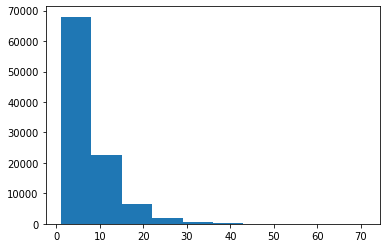

In [19]:
import matplotlib.pyplot as plt

plt.hist(list1)
plt.show()

The distribution is not normal!  Seems like it is mostly just a few rolls.  I wonder what the expected or average value is.  Here I do 1000 games 1000 times.  This is the Monte Carlo simulation of lots of craps tables!

In [20]:
list2 = []
for j in range(1000):
  list1 = []
  for i in range(1000):
    list1.append(PlayCraps())
  list2.append(sum(list1)/len(list1))

(array([ 19.,  35., 106., 169., 235., 196., 123.,  78.,  30.,   9.]),
 array([6.162 , 6.2672, 6.3724, 6.4776, 6.5828, 6.688 , 6.7932, 6.8984,
        7.0036, 7.1088, 7.214 ]),
 <a list of 10 Patch objects>)

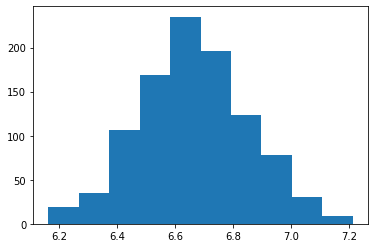

In [21]:
plt.hist(list2)

In [22]:
from numpy import mean

mean(list2)

6.66408

As I perused the internet for this value, I found lots of answers that were larger!  How can that be!  At first I thought I had the program wrong.  Below I write some code to check the craps game by hand.

In [23]:
def ErrorTestingPlayCraps():
  listOfRolls = []
  randRoll = Roll2Dice()
  listOfRolls.append(randRoll)
  x = ComeOutRoll(randRoll)
  rollCounter = 1
  PassLineWins = 0
  while (x != 'Craps')&(x != 'SevenOut'):
    if x == 'comeAgain':
      listOfRolls.append('Pass Line Win')
      PassLineWins += 1
      rollCounter += 1
      randRoll = Roll2Dice()
      listOfRolls.append(randRoll)
      x = ComeOutRoll(randRoll)
    else:
      point = x
      rollCounter += 1
      randRoll = Roll2Dice()
      listOfRolls.append(randRoll)
      listOfRolls.append(point)
      x = SetPointRoll(randRoll,point)
  else:
    listOfRolls.append(x)
  return rollCounter, listOfRolls

In [55]:
ErrorTestingPlayCraps()

(3, [[4, 2], [1, 4], 6, [5, 2], 6, 'SevenOut'])

In [25]:
ErrorTestingPlayCraps()

(19,
 [[6, 2],
  [3, 6],
  8,
  [1, 5],
  8,
  [5, 5],
  8,
  [3, 1],
  8,
  [5, 4],
  8,
  [4, 1],
  8,
  [4, 6],
  8,
  [2, 1],
  8,
  [2, 4],
  8,
  [6, 3],
  8,
  [5, 6],
  8,
  [3, 5],
  8,
  'Pass Line Win',
  [4, 1],
  [2, 6],
  5,
  [1, 1],
  5,
  [2, 1],
  5,
  [2, 2],
  5,
  [4, 3],
  5,
  'SevenOut'])

This simulation is more fun as it really shows you what happens on each roll.


Trying this ***many*** times, I did not see an error.  This makes me feel like the reference [here](https://wizardofodds.com/ask-the-wizard/craps/probability/) has an error in their computation.  Let's see if we can find the value theoretically we have simulated!

## Some Maths

Here is the theoretical expected value.  Call the expected value $x$.  Then on the **ComeOutRoll**, craps results in the end of the game, natural results in playing the game again plus the roll you made and setting the point will result in a small game.

Each point will have a different expected value.  The point at 4 or 10 will result in an expected value of 4 (point rolls end with 4 or 7 $p = \frac{9}{36}$)  The game continues the probability of $\frac39$.  All the rest are similar.  This creates an expected value computation of

$$
x
=
\frac4{36}
+
\frac8{36}(x+1)
+
2\cdot \frac3{36}\left(4+1+\frac39x\right)
+
2\cdot \frac4{36}\left(3.6+1+\frac4{10}x\right)
+
2\cdot \frac5{36}\left(\frac{36}{11}+1+\frac5{11}x\right)
$$

In [26]:
import sympy

x = sympy.Symbol('x')
sympy.solve(4/36+8/36*(x+1)+2*3/36*(5+3/9*x)+8/36*(4.6+4/10*x)+10/36*(36/11+1+5/11*x)-x,x)

[6.65737051792830]

### An Attempt to Compute the Variance

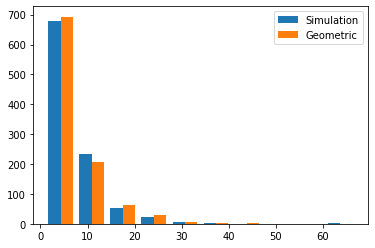

In [27]:
z = np.random.geometric(p=251/1671, size=1000)

ax = plt.hist([list1,z])
plt.legend(labels = ['Simulation','Geometric'])
plt.show()

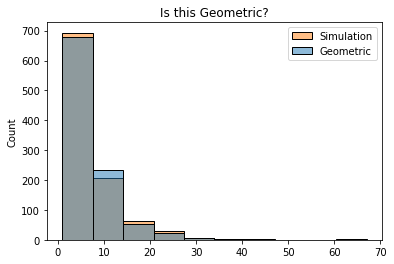

In [28]:
import seaborn as sns

ax = sns.histplot([list1,z], multiple = 'layer', bins = 10) 
plt.legend(labels = ['Simulation','Geometric'])
ax.set(title='Is this Geometric?')
plt.show()

I am curious if I can use this to match up the variance.  Under the assumption that this is a geometric distribution (I stretch I think!)  The expected value is 
$$
E[x] = \frac1p = \frac{1671}{251}\approx 6.657
$$
The variance is similarly computed as
$$
E\left[\left(x-E[x]\right)^2\right] = \frac{1-p}{p^2} = \frac{1671\cdot 1420}{251^2} \approx 37.663
$$



In [29]:
import numpy as np

(np.std(list1))**2


38.316544

The random variables generated from the geometric distribution have a variance of

In [30]:
(np.std(z))**2

37.446751

Not terribly far off.  Let's do a little more thorough checking of this value using a Monte Carlo simulation.

In [31]:
list2 = []
for j in range(1000):
  list1 = []
  for i in range(1000):
    list1.append(PlayCraps())
  list2.append((np.std(list1))**2)

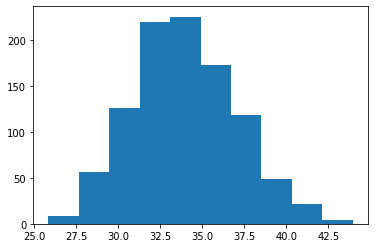

In [32]:
plt.hist(list2)
plt.show()

In [33]:
xbar = mean(list2)
s = np.std(list2)

print("mean is {} and standard deviation is {}".format(xbar,s))

mean is 33.95546612 and standard deviation is 3.038423534530926


This is clearly not correct.  It gives me an estimate but I am missing some important behavior of the random variable.  Using the numerical simulation gives me a great way to check this though!  

To be thorough, I'll run a hypothesis test.  Could the variance be 37.663 if the mean of 1000 of them is 33.853?  This will look a little strange but because of the way I have simulated it, I am asking can $\mu = 37.663$ if $\bar x \approx 33.8$ with $n = 1000$?

$$
t = \frac{\mu - \bar x}{\frac{s}{\sqrt{n}}}
$$

Degrees of freedom here will be 999.

In [34]:
t = (37.663-xbar)/(s/np.sqrt(1000))

t

38.586627011666394

In [35]:
1-stats.t.cdf(t,999)

0.0

## I didn't understand the game of craps!

The only time you must pass the dice is when you seven out.  Although the pass line bet loses on a craps roll, you can roll again.  Let's fix that in our code!

In [36]:
def PlayCraps4Real():
  x = ComeOutRoll(Roll2Dice())
  rollCounter = 1
  while (x != 'SevenOut'):
    if (x == 'comeAgain') or (x == 'Craps'):
      rollCounter += 1
      x = ComeOutRoll(Roll2Dice())
    else:
      point = x
      rollCounter += 1
      x = SetPointRoll(Roll2Dice(),point)
  return rollCounter

In [37]:
list10 = []
for i in range(100000):
  list10.append(PlayCraps4Real())
sum(list10)/len(list10)

8.52765

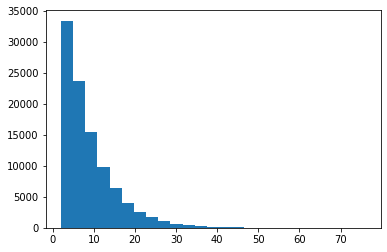

In [38]:
plt.hist(list10, bins = 25)
plt.show()

In [39]:
list20 = []
for j in range(1000):
  list15 = []
  for i in range(1000):
    list15.append(PlayCraps4Real())
  list20.append(sum(list15)/len(list15))

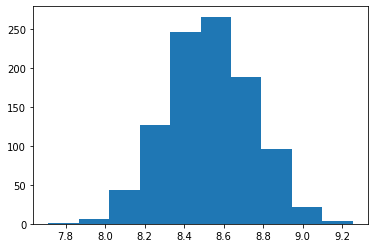

In [40]:
plt.hist(list20)
plt.show()

In [41]:
mean(list20)

8.529967000000001

It should have been!

$$
x
=
\frac4{36}(x+1)
+
\frac8{36}(x+1)
+
2\cdot \frac3{36}\left(4+1+\frac39x\right)
+
2\cdot \frac4{36}\left(3.6+1+\frac4{10}x\right)
+
2\cdot \frac5{36}\left(\frac{36}{11}+1+\frac5{11}x\right)
$$

In [42]:
x = sympy.Symbol('x')
sympy.solve(12/36*(x+1)+2*3/36*(5+3/9*x)+8/36*(4.6+4/10*x)+10/36*(36/11+1+5/11*x)-x,x)

[8.52551020408164]

This agrees with the reference from above...

